In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [202]:
paths_to_csv_files = [os.path.join('data', file) for file in os.listdir('data') if file.endswith('csv')]

In [203]:
paths_to_csv_files

['data/mnist.csv', 'data/data_2d.csv']

In [204]:
data_2d = pd.read_csv(paths_to_csv_files[1])

In [205]:
data_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


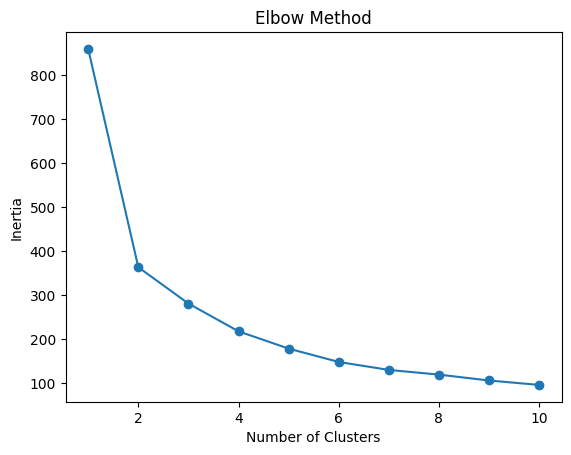

In [206]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_2d)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [207]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data_2d)

KMeans(n_clusters=2, n_init=10)

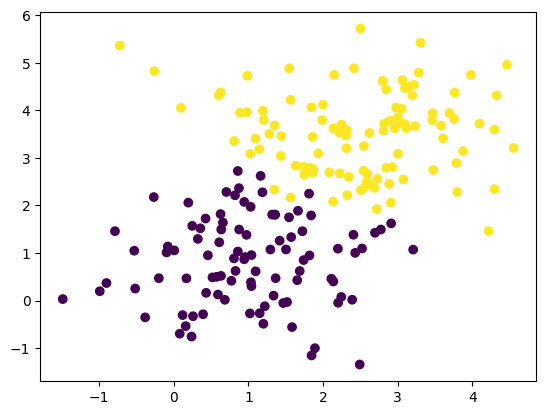

In [208]:
plt.scatter(data_2d['-7.687164597386728637e-01'],	data_2d['4.608603078297135447e-01'], c=kmeans.labels_)
plt.show()

In [209]:
data_mnist = pd.read_csv(paths_to_csv_files[0])

In [210]:
data_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
pca = PCA(n_components=2)

In [212]:
pca = pca.fit_transform(data_mnist)

In [213]:
pca = pd.DataFrame(pca)
pca.head()

,0,1
0,-75.853326,-1043.508195
1,-969.409465,-344.769813
2,1054.122233,-358.680839
3,420.941168,671.093418
4,-1002.830726,-302.500896


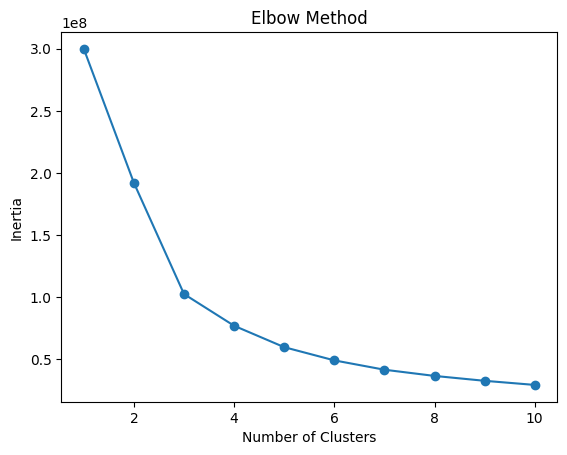

In [214]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [215]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(pca)

KMeans(n_clusters=3, n_init='auto')

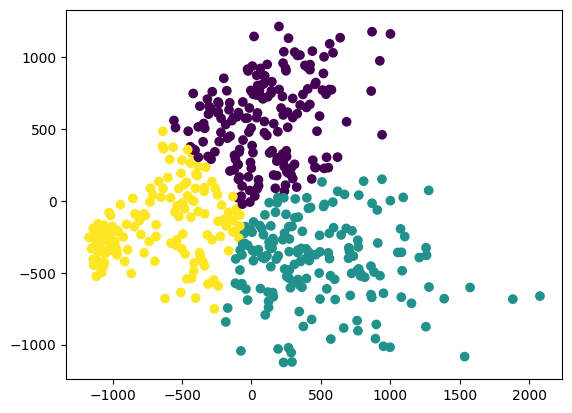

In [216]:
plt.scatter(pca[0], pca[1], c=kmeans.labels_)
plt.show()